In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
df=pd.read_csv("./data/서울특별시 공공자전거 대여이력 정보_2502.csv",
encoding="cp949",parse_dates=["대여일시", "반납일시"],
    date_format="%Y-%m-%d %H:%M:%S",
)

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629540 entries, 0 to 1629539
Data columns (total 17 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   자전거번호     1629540 non-null  object        
 1   대여일시      1629540 non-null  datetime64[ns]
 2   대여 대여소번호  1629540 non-null  object        
 3   대여 대여소명   1629540 non-null  object        
 4   대여거치대     1629540 non-null  object        
 5   반납일시      1629540 non-null  datetime64[ns]
 6   반납대여소번호   1629540 non-null  object        
 7   반납대여소명    1629540 non-null  object        
 8   반납거치대     1629540 non-null  object        
 9   이용시간(분)   1629540 non-null  int64         
 10  이용거리(M)   1629540 non-null  float64       
 11  생년        1629540 non-null  object        
 12  성별        1207415 non-null  object        
 13  이용자종류     1629540 non-null  object        
 14  대여대여소ID   1629540 non-null  object        
 15  반납대여소ID   1629540 non-null  object        
 16  자전거구분     1629540 

In [6]:
rent_location = pd.read_excel("./data/공공자전거 대여소 정보(25.12월 기준).xlsx",
                            sheet_name="대여소현황",
                            skiprows=5,
                            engine="openpyxl",
                            header=None,
                            index_col=None,
                            names=["대여소번호", "대여소명", "자치구", "상세주소", "위도", "경도","설치시가","LCD","QR","운영방식",],
                            )
print(rent_location.info() )
print(rent_location.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2799 non-null   int64  
 1   대여소명    2799 non-null   object 
 2   자치구     2799 non-null   object 
 3   상세주소    2799 non-null   object 
 4   위도      2799 non-null   float64
 5   경도      2799 non-null   float64
 6   설치시가    2799 non-null   object 
 7   LCD     1065 non-null   float64
 8   QR      1740 non-null   float64
 9   운영방식    2799 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 218.8+ KB
None
   대여소번호         대여소명  자치구               상세주소         위도          경도  \
0    102   망원역 1번출구 앞  마포구  서울특별시 마포구 월드컵로 72  37.555649  126.910629   
1    103   망원역 2번출구 앞  마포구  서울특별시 마포구 월드컵로 79  37.554951  126.910835   
2    104   합정역 1번출구 앞  마포구   서울특별시 마포구 양화로 59  37.550629  126.914986   
3    105   합정역 5번출구 앞  마포구   서울특별시 마포구 양화로 48  37.550007  126.914825   
4    106   합정역 7번출구 

In [7]:
def add_lat_lon_to_rent(rent,location):
    location=location.copy()
    location["대여소번호"] = location["대여소번호"].apply(lambda x: f"{x:05d}")

    loc_cols =["대여소번호","자치구","위도","경도"]

    rent=rent.merge(
        location[loc_cols].rename(
            columns={
                "대여소번호":"대여 대여소번호",
                "자치구":"대여 자치구",
                "위도":"대여 위도",
                "경도":"대여 경도",
            }
        ),
        on="대여 대여소번호",
        how="left",
    )

    rent=rent.merge(
        location[loc_cols].rename(
            columns={
                "대여소번호":"반납대여소번호",
                "자치구":"반납 자치구",
                "위도":"반납 위도",
                "경도":"반납 경도",
            }
        ),
        on="반납대여소번호",
        how="left",
    )
    return rent

combined_with_location = add_lat_lon_to_rent(df, rent_location)
print(combined_with_location.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629540 entries, 0 to 1629539
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   자전거번호     1629540 non-null  object        
 1   대여일시      1629540 non-null  datetime64[ns]
 2   대여 대여소번호  1629540 non-null  object        
 3   대여 대여소명   1629540 non-null  object        
 4   대여거치대     1629540 non-null  object        
 5   반납일시      1629540 non-null  datetime64[ns]
 6   반납대여소번호   1629540 non-null  object        
 7   반납대여소명    1629540 non-null  object        
 8   반납거치대     1629540 non-null  object        
 9   이용시간(분)   1629540 non-null  int64         
 10  이용거리(M)   1629540 non-null  float64       
 11  생년        1629540 non-null  object        
 12  성별        1207415 non-null  object        
 13  이용자종류     1629540 non-null  object        
 14  대여대여소ID   1629540 non-null  object        
 15  반납대여소ID   1629540 non-null  object        
 16  자전거구분     1629540 

In [8]:
print(combined_with_location.head())

       자전거번호                대여일시 대여 대여소번호         대여 대여소명 대여거치대  \
0  SPB-41846 2025-02-01 00:01:04    01308   안암로터리 버스정류장 앞     0   
1  SPB-60204 2025-02-01 00:00:14    03500         군자역2번출구     0   
2  SPB-60407 2025-02-01 00:01:54    00398     을지로3가역 3번출구     0   
3         \N 2025-02-01 00:01:34    00864  순천향대학병원(한남오거리)     0   
4  SPB-50025 2025-02-01 00:00:30    00558    성동광진 교육지원청 앞     0   

                 반납일시 반납대여소번호          반납대여소명 반납거치대  이용시간(분)  ...  이용자종류  \
0 2025-02-01 00:03:54   00614         용두동 사거리     0        2  ...    내국인   
1 2025-02-01 00:03:56   03517           용마사거리     0        3  ...    내국인   
2 2025-02-01 00:04:37   00389     을지로4가역 1번출구     0        2  ...    내국인   
3 2025-02-01 00:04:48   00864  순천향대학병원(한남오거리)     0        3  ...    내국인   
4 2025-02-01 00:05:27   03558   마장동 금호어울림APT앞     0        4  ...    내국인   

   대여대여소ID  반납대여소ID    자전거구분 대여 자치구      대여 위도       대여 경도 반납 자치구      반납 위도  \
0   ST-827   ST-273  BIK_002    성북구  37.582592  127.028976  

In [ ]:
def add_dayofweek_and_weekend(df):
    days_kr=["월","화","수","목","금","토","일"]
    df["요일"] = df["대여일시"].dt.dayofweek.map(lambda x: days_kr[x])
    df["주말"] = df["대여일시"].dt.dayofweek >=5
    return df

combined_with_location = add_dayofweek_and_weekend(combined_with_location)
print(combined_with_location[["대여일시","요일","주말"]].tail())
print(combined_with_location.info())

                 대여일시 요일    주말
0 2025-02-01 00:01:04  토  True
1 2025-02-01 00:00:14  토  True
2 2025-02-01 00:01:54  토  True
3 2025-02-01 00:01:34  토  True
4 2025-02-01 00:00:30  토  True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629540 entries, 0 to 1629539
Data columns (total 25 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   자전거번호     1629540 non-null  object        
 1   대여일시      1629540 non-null  datetime64[ns]
 2   대여 대여소번호  1629540 non-null  object        
 3   대여 대여소명   1629540 non-null  object        
 4   대여거치대     1629540 non-null  object        
 5   반납일시      1629540 non-null  datetime64[ns]
 6   반납대여소번호   1629540 non-null  object        
 7   반납대여소명    1629540 non-null  object        
 8   반납거치대     1629540 non-null  object        
 9   이용시간(분)   1629540 non-null  int64         
 10  이용거리(M)   1629540 non-null  float64       
 11  생년        1629540 non-null  object        
 12  성별        1207415 non-nu

In [10]:
print(combined_with_location[["대여일시","요일","주말"]].tail())
print(combined_with_location.info())

                       대여일시 요일     주말
1629535 2025-02-28 17:38:33  금  False
1629536 2025-02-28 23:25:32  금  False
1629537 2025-02-28 23:25:58  금  False
1629538 2025-02-28 23:55:16  금  False
1629539 2025-02-28 23:48:32  금  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629540 entries, 0 to 1629539
Data columns (total 25 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   자전거번호     1629540 non-null  object        
 1   대여일시      1629540 non-null  datetime64[ns]
 2   대여 대여소번호  1629540 non-null  object        
 3   대여 대여소명   1629540 non-null  object        
 4   대여거치대     1629540 non-null  object        
 5   반납일시      1629540 non-null  datetime64[ns]
 6   반납대여소번호   1629540 non-null  object        
 7   반납대여소명    1629540 non-null  object        
 8   반납거치대     1629540 non-null  object        
 9   이용시간(분)   1629540 non-null  int64         
 10  이용거리(M)   1629540 non-null  float64       
 11  생년        1629540 non-null  ob

In [11]:
import matplotlib

matplotlib.rc("font",family="NanumGothic")

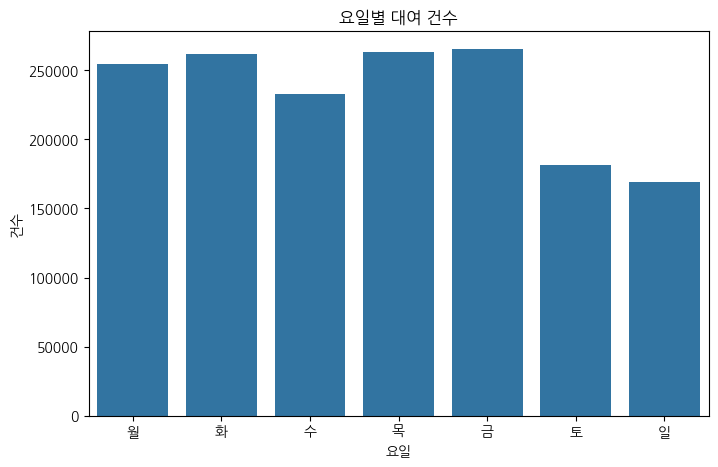

In [12]:
from matplotlib.pyplot import plot


def plot_dayofweek_count(df):
    plt.figure(figsize=(8,5))
    order=["월","화","수","목","금","토","일"]
    sns.countplot(data=df,x="요일",order=order)
    plt.title("요일별 대여 건수")
    plt.xlabel("요일")
    plt.ylabel("건수")
    plt.show()

plot_dayofweek_count(combined_with_location)

In [15]:
def make_pivot_by_hour_and_day(df):
    order = ["월", "화", "수", "목", "금", "토", "일"]

    df["요일"] = pd.Categorical(df["요일"], categories=order, ordered=True)
    df["대여시간대"] = df["대여일시"].dt.hour
    pivot=df.groupby(["대여시간대","요일"]).size().unstack(fill_value=0)
    return pivot

pivot_df = make_pivot_by_hour_and_day(combined_with_location)
print(pivot_df.head())

요일        월     화     수     목     금     토     일
대여시간대                                          
0      3186  3924  4367  4318  4731  4316  4614
1      2243  3077  3349  3412  3606  3703  3560
2      1629  1988  2306  2266  2429  2634  2612
3      1333  1540  1712  1663  1856  2016  1857
4      1500  1575  1637  1610  1642  1515  1339


C:\Users\miyeo\AppData\Local\Temp\ipykernel_35892\732364468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot=df.groupby(["대여시간대","요일"]).size().unstack(fill_value=0)


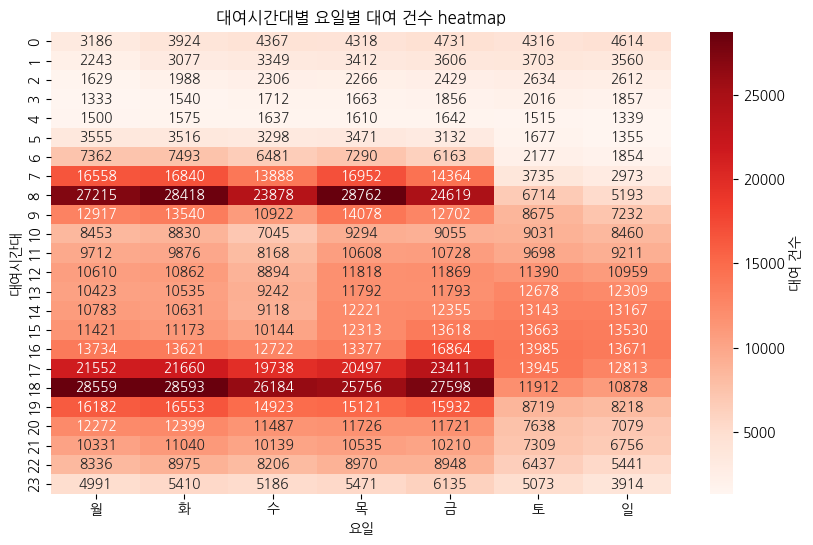

In [17]:
def draw_heatmap(pivot_df,title,xlabel,ylabel):
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_df,
                annot=True,
                fmt="d",
                cmap="Reds",
                cbar_kws={"label":"대여 건수"},
                xticklabels=True,
                yticklabels=True,
                ).set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

draw_heatmap(pivot_df,"대여시간대별 요일별 대여 건수 heatmap","요일","대여시간대")

<Figure size 1800x700 with 0 Axes>

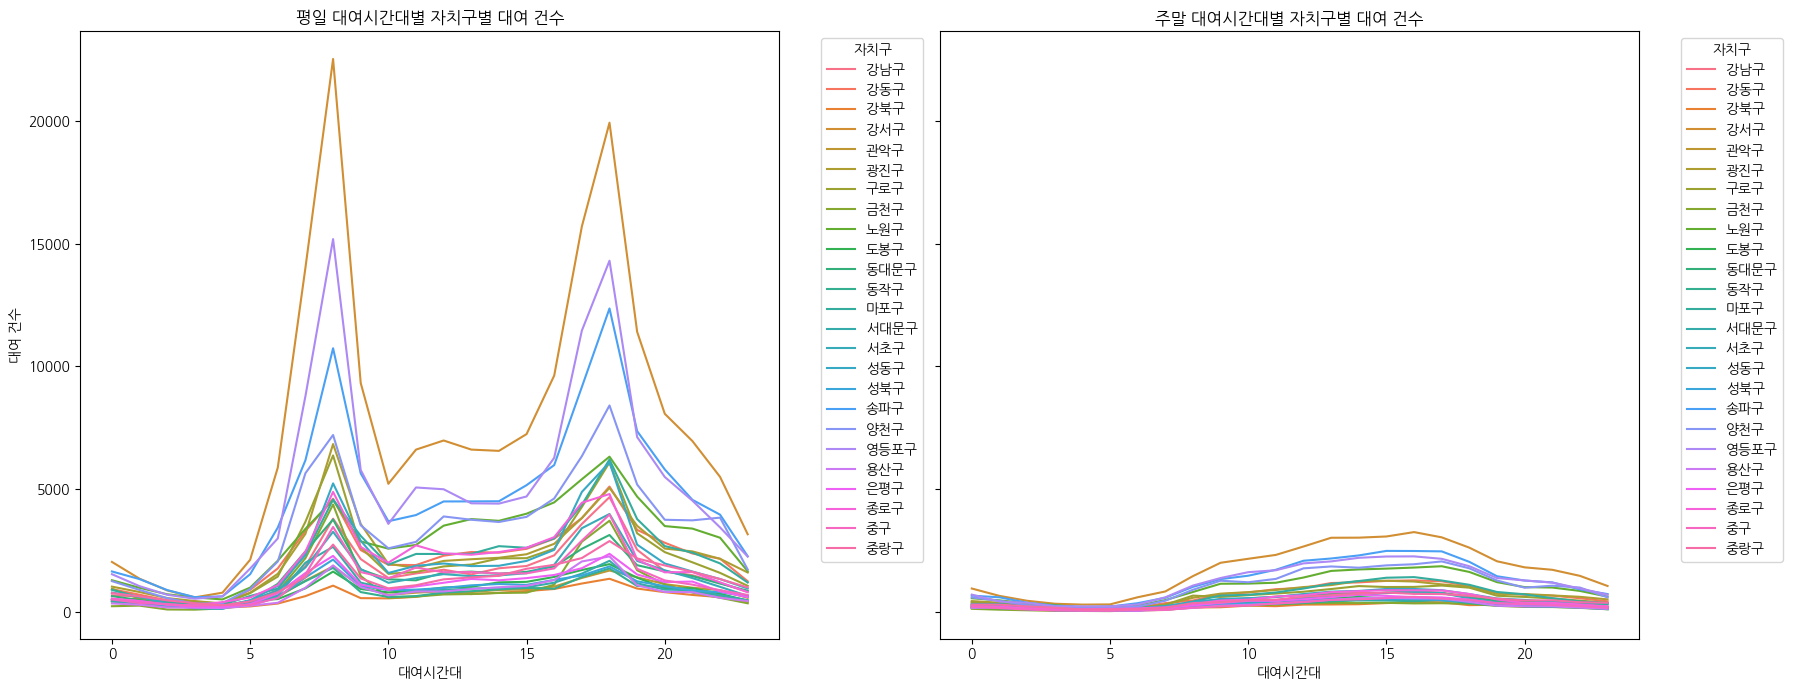

In [19]:
def plot_usage_by_weekend(df):
    plt.figure(figsize=(18,7))
    df_grouped=(
        df.groupby(["대여시간대","주말","대여 자치구"]).size().reset_index(name="count")
    )

    weekday= df_grouped[df_grouped["주말"]==False]
    weekend= df_grouped[df_grouped["주말"]==True]

    fig,axes = plt.subplots(1,2, figsize=(18,7),sharey=True)
    sns.lineplot(data=weekday,x="대여시간대",y="count",hue="대여 자치구",ax=axes[0])
    axes[0].set_title("평일 대여시간대별 자치구별 대여 건수")
    axes[0].set_xlabel("대여시간대")
    axes[0].set_ylabel("대여 건수")
    axes[0].legend(title="자치구",bbox_to_anchor=(1.05,1),loc="upper left")

    sns.lineplot(data=weekend,x="대여시간대",y="count",hue="대여 자치구",ax=axes[1] )
    axes[1].set_title("주말 대여시간대별 자치구별 대여 건수")
    axes[1].set_xlabel("대여시간대")
    axes[1].set_ylabel("대여 건수")
    axes[1].legend(title="자치구",bbox_to_anchor=(1.05,1),loc="upper left")

    plt.tight_layout()
    plt.show()

plot_usage_by_weekend(combined_with_location)     


In [23]:
def draw_choropleth_by_gu(df,geojson_path,value_col,legend_name):
    data_by_gu = df.groupby("대여 자치구")[value_col].count().reset_index()
    data_by_gu.columns=["대여 자치구",value_col]

    seoul_center = [37.5665, 126.9780]
    m = folium.Map(location=seoul_center, zoom_start=11)

    folium.Choropleth(
        geo_data=geojson_path,
        data=data_by_gu,
        columns=["대여 자치구",value_col],
        key_on="feature.properties.name",
        fill_color="YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name,
    ).add_to(m)

    return m

m=draw_choropleth_by_gu(combined_with_location,"05-seoul.json","자전거번호","대여 건수")
m.save("bikeshare_choropleth.html")
    